# YAP Jupyter Interface 

## Walkthrough and User Guide

The next cells show examples  of input output interaction with Prolog and Jupyter. We assume basic knowledge of both Prolog and Python/R/Jupyter. Notice that this is experimental software, subject to bugs and change. Also remember that 
  - all cells in the same page belong to the same process;
  - _magic_ refers to annotations that perform extra, non-trivial work
  - check the top=right ball right to the side of `YAP 6`: if empty the system is avsilable; otherwise, it is busy, 

### Basic Usage

Any Prolog system should be able to unify two terms:

In [1]:
X= s

X = s
No (more) answers


In [2]:
X = 2


X = 2
No (more) answers


In [3]:
f(X,['olá',X] = f(`hello`,Z)

No (more) answers


In [4]:
f(X,['olá',X]) = f(`hello`,Z)

X = "hello",
Z = ['ol����',"hello"]
No (more) answers


In [5]:
X=Y

X = Y
No (more) answers


You observe that the first time you press `shift-enter` or `ctl-enter`, YAP/Jupyter writes down `X=2`, the answer. If you press down `shift-enter` again, it writes `No (more) answers`  Pressing again returns you to the first answer, `X=2`:

- In YAP/Jupyter cells have a state that depends on how many answers you generated.

The next example shows a more complex notion of state:

In [ ]:
between(1,100,I), J is I^I

The YAP  `^` operator generates floating-point numbers for large exponentials. You can try replacing `^` by `**` in the cell: notice that the cell state is reset, as changes in the text of a cell may mean anything. 

If you want to look at all solutions, you can place an `*` at the end of cell:

In [ ]:
between(1,20,I), J is 20-I, IJ is I*J *


NB: in the current version, the states in a page are single-threaded, meaning only  one cell is active at a rime.

## Programming with cells

Cells can  store programs: in fact, by default that is what they should do. 

The next cell shows a program to recognise state-checking predicates:

In [1]:
state_info(Name/Arity) :- 
    current_predicate(Name/Arity), 
    atom_concat(current,_,Name).
state_info(Name/Arity) :- 
    system_predicate(Name/Arity),
    atom_concat(current,_,Name).

 % reconsulting jupyter cell...
 % reconsulted ??? in module user, 7 msec 0 bytes
No (more) answers


A query cell follows:

In [2]:
 state_info(P)*

P = current_mutex/3
P = current_module/2
P = current_module/1
P = current_atom/1
P = current_key/2
P = current_predicate/1
P = current_predicate/2
P = current_thread/2
P = current_char_conversion/2
P = current_line_number/2
P = current_line_number/1
P = current_stream/3
P = current_op/3
P = current_prolog_flag/2
P = current_source_module/2
P = current_host/1
P = current_output/1
P = current_input/1
P = current_reference_count/2
No (more) answers


Notice that you need to consult the program cell first. Of course, we can just do both: 

In [3]:

generate_ith(I, I, [Head|Tail], Head, Tail).
generate_ith(I, IN, [_|List], El, Tail) :-
	I1 is I+1,
	generate_ith(I1, IN, List, El, Tail).

ith(V, In, Element, Tail) :- var(V), !,
	generate_ith(0, V, In, Element, Tail).
ith(0, [Head|Tail], Head, Tail) :- !.
ith(N, [Head|Tail], Elem, [Head|Rest]) :-
	M is N-1,
	ith(M, Tail, Elem, Rest).

ith(X,[1,2,3,4,5],4, T)



 % reconsulting jupyter cell...
 % reconsulted ??? in module user, 15 msec 0 bytes
T = [5],
X = 3
No (more) answers


In [ ]:
%%bash

ls

#y#
CMakeCache.txt
CMakeCache.txt~
CMakeDoxyfile.in
CMakeDoxyfile.tpl.bak
CMakeDoxygenDefaults.cmake
CMakeFiles
CXX
FindPackageLog.txt
GitSHA1.c
H
Makefile
OPTYap
PropsOfAE
Untitled.ipynb
Untitled1.ipynb
Untitled10.ipynb
Untitled11.ipynb
Untitled2.ipynb
Untitled3.ipynb
Untitled4.ipynb
Untitled5.ipynb
Untitled6.ipynb
Untitled7.ipynb
Untitled8.ipynb
Untitled9.ipynb
YAP.cbp
YapConfig.h
YapIOConfig.h
YapTermConfig.h
cmake_install.cmake
compile_commands.json
config.h
cudd_config.h
dlocals.h
docs
i
install_manifest.txt
libYap.6.3.5.dylib
libYap.6.3.5.dylib.dSYM
libYap.6.3.dylib
libYap.dylib
library
m
meta.js
myddas.yap
new~~cc
os
packages
pl
swiLibrary
temp-dir
test2.png
untitled.txt
utf8proc
x
x.yap
y
yap
yap.dSYM
y~


bash: line 1: fg: no job control


### Magic

YAP allows the standard magics, buth with line and cell:

- line magics should be the first non-empty line, and must start with `%` followed immediately by the name.

- cell magaics start with `%%` and must be the only magic in the cell.

You can use the completion mechanism to list all magics.

The next cell shows a cell magic that starts a bash shell.

ERROR! Session/line number was not unique in database. History logging moved to new session 5605
 % reconsulting jupyter cell...
 % reconsulted ??? in module user, 16 msec 0 bytes

No (more) answers


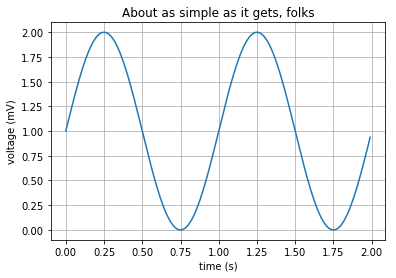

In [4]:
%matplotlib inline

main :- 
    := import( matplotlib.pyplot ),
    := import( numpy ),
    Plt = matplotlib.pyplot,
    Np = numpy,
    t := Np.arange(0.0, 2.0, 0.01),
    s := 1 + Np.sin(2*Np.pi*t),
    := Plt.plot(t, s),
    := Plt.xlabel(`time (s)`),
    := Plt.ylabel(`voltage (mV)`),
    := Plt.title(`About as simple as it gets, folks`),
    := Plt.grid(true),
    := Plt.savefig(`test2.png`),
    := Plt.show().

main

In [3]:

main2 :-
    python_import( numpy),
    python_import( matplotlib.mlab),
    python_import( matplotlib.pyplot ),
    NP = numpy,
    Mlab = matplotlib.mlab,
    Plt = matplotlib.pyplot,

    /* example data */
    Mu = 100,  /* mean of distribution, */
    Sigma = 15,  /* standard deviation of distribution, */
    x := Mu + Sigma * NP.random.randn(10000),
    NumBins = 50,
/* the histogram of the data */
t(n, bins, patches) := Plt.hist(x, NumBins, normed=1, facecolor= `green`, alpha=0.5),
/* add a `best fit` line */
y := Mlab.normpdf(bins, mu, sigma),
:= Plt.plot(bins, y, `r--`),
:= Plt.xlabel(`Smarts`),
:= Plt.ylabel(`Probability`),
:=Plt.title(`Histogram of IQ: $\\mu=100$, $\\sigma=15$ `),
/* Tweak spacing to prevent clipping of ylabel, */
:= Plt.show().
   
   main2


SyntaxError: bracket or operator expected. (<string>, line 8)

 % reconsulting jupyter cell...
 % reconsulted ??? in module user, 20 msec 0 bytes
No (more) answers


In [ ]:
%%python3

dir(__root__)

  File "<stdin>", line 1
    %%python3
    ^
SyntaxError: invalid syntax


In [2]:
:- python_import(bqplot).
:- python_import(numoy).

:- Plt = bqplot.pyplot,
    Np = numpy,
 := Plt.figure(1, title=`Line Chart`),
 := Np.random.seed(0),
n = 200,
x = Np.linspace(0.0, 10.0, n).
y = Np.cumsum(np.random.randn(n)),
:= Plt.plot(x, y),
:= Plt.show().


SyntaxError: bracket or operator expected. (<string>, line 8)

SyntaxError: bracket or operator expected. (<string>, line 8)

 % reconsulting jupyter cell...
:- user:python_import(numoy) failed.
 % reconsulted ??? in module user, 262 msec 0 bytes
No (more) answers


In [3]:
:-[library(real)].

X <- c(1:10), Y := sin(X)

No (more) answers


In [ ]:
X:=x

In [ ]:
%% javascript
